Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221 entries, 0 to 8220
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        8221 non-null   object
 1   Text            8221 non-null   object
 2   Processed_Text  8221 non-null   object
dtypes: object(3)
memory usage: 192.8+ KB
None

Missing Values:
 Category          0
Text              0
Processed_Text    0
dtype: int64

Category Counts:
 Category
hr-manager                  7
cybersecurity               6
machine-learning            6
executive-manager           6
customer-success-manager    6
                           ..
farm-manager                1
bag-grader                  1
farm                        1
fan-mail-editor             1
galley-cook                 1
Name: count, Length: 4162, dtype: int64


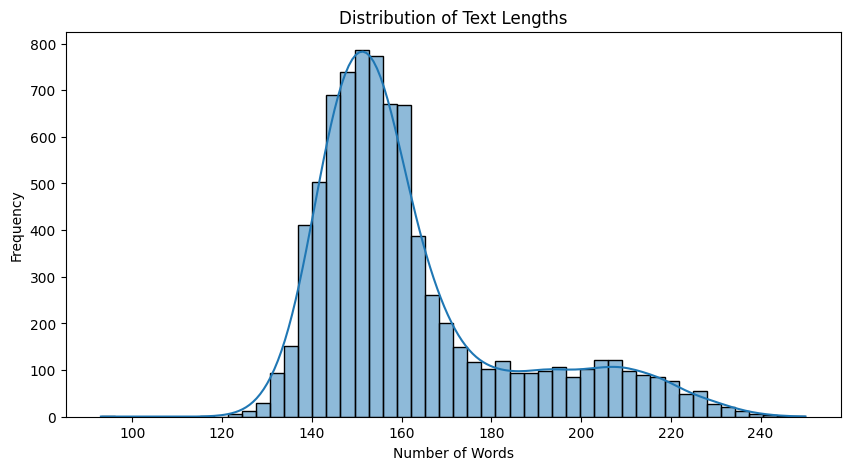

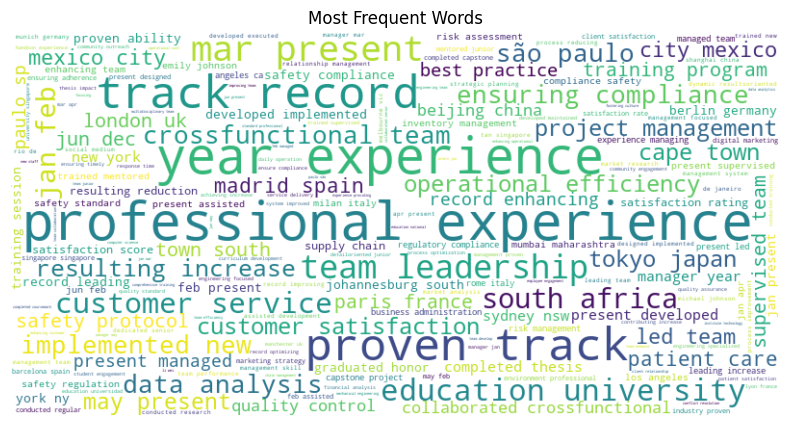

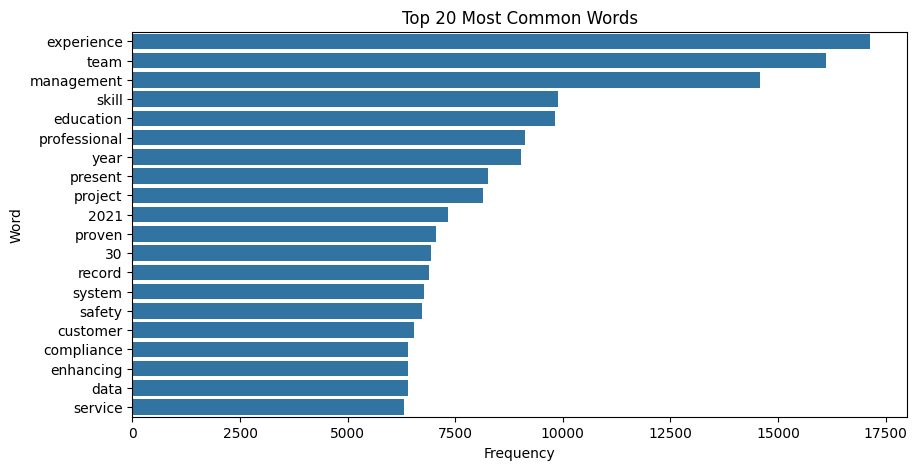

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load the dataset
file_path = "preprocessed_cv_text_data.csv"
df = pd.read_csv(file_path)

# Basic info
def basic_info(df):
    print("Dataset Info:\n")
    print(df.info())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nCategory Counts:\n", df['Category'].value_counts())

# Text length analysis
def text_length_analysis(df):
    df['text_length'] = df['Processed_Text'].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(10,5))
    sns.histplot(df['text_length'], bins=50, kde=True)
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Distribution of Text Lengths')
    plt.show()

# Generate WordCloud
def generate_wordcloud(df):
    text = ' '.join(df['Processed_Text'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Frequent Words")
    plt.show()

# Most common words
def common_words(df, n=20):
    words = ' '.join(df['Processed_Text'].dropna()).split()
    common_words = Counter(words).most_common(n)
    common_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    plt.figure(figsize=(10,5))
    sns.barplot(x='Frequency', y='Word', data=common_df)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title(f'Top {n} Most Common Words')
    plt.show()

# Run all EDA functions
basic_info(df)
text_length_analysis(df)
generate_wordcloud(df)
common_words(df)
